# CRISP-DM
In working with missing values, categorical variables, and building out your model, it was probably easy to lose sight of the big picture of the process. Let's take a quick second to recap that here, and pull together the results you should have arrived through your analysis.

    1. Business Understanding

    How do I break into the field?
    What are the placement and salaries of those who attended a coding bootcamp?
    How well can we predict an individual's salary? What aspects correlate well to salary?
    How well can we predict an individual's job satisfaction? What aspects correlate well to job satisfaction?
    2. Data Understanding

    Here we used the stackoverflow data to attempt to answer our questions of interest. We did 1. and 2. in tandem in this case, using the data to help us arrive at our questions of interest. This is one of two methods that is common in practice. The second method that is common is to have certain questions you are interested in answering, and then having to collect data related to those questions.

    3. Prepare Data

    This is commonly denoted as 80% of the process. You saw this especially when attempting to build a model to predict salary, and there was still much more you could have done. From working with missing data to finding a way to work with categorical variables, and we didn't even look for outliers or attempt to find points we were especially poor at predicting. There was ton more we could have done to wrangle the data, but you have to start somewhere, and then you can always iterate.

    4. Model Data

    We were finally able to model the data, but we had some back and forth with step 3. before we were able to build a model that had okay performance. There still may be changes that could be done to improve the model we have in place. From additional feature engineering to choosing a more advanced modeling technique, we did little to test that other approaches were better within this lesson.

    5. Results

    Results are the findings from our wrangling and modeling. 
    
    6. Deploy

    Deploying can occur by moving your approach into production or by using your results to persuade others within a company to act on the results. Communication is such an important part of the role of a data scientist.

In [447]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split



In [2]:
# Read data files for 2017 and 2018
survey_2017 = pd.read_csv("/Users/monikabagyal/Google Drive/Udacity/Practice_Notebooks/StackOverflow_DataAnalysis/datafiles/2017/survey_results_public.csv")
schema_2017 = pd.read_csv("/Users/monikabagyal/Google Drive/Udacity/Practice_Notebooks/StackOverflow_DataAnalysis/datafiles/2017/survey_results_schema.csv")
#
survey_2018 = pd.read_csv("/Users/monikabagyal/Google Drive/Udacity/Practice_Notebooks/StackOverflow_DataAnalysis/datafiles/2018/survey_results_public.csv")
schema_2018 = pd.read_csv("/Users/monikabagyal/Google Drive/Udacity/Practice_Notebooks/StackOverflow_DataAnalysis/datafiles/2018/survey_results_schema.csv")




/Users/monikabagyal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
survey_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
survey_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [5]:
schema_2017.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [6]:
schema_2018.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."


# How to enter the field?

In [8]:
survey_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [9]:
schema_2017

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [22]:
education=survey_2017[['CousinEducation']].fillna('No Answer')

In [215]:
education=survey_2017[['CousinEducation']]


education=education.dropna()

final_list = []
for item in list(education.CousinEducation):
    final_list.append(item.split(';'))
education=pd.DataFrame(final_list)

education.columns = ['col1','col2','col3', 'col4']

education = pd.DataFrame(list(education['col1']) + list(education['col2']) 
                         + list(education['col3']) + list(education['col3']))


education.columns = ['method']
#ed_df1.value_counts()

#education.method.value_counts()

education['method'] = education['method'].apply(lambda x: str(x).strip())
education = education[education['method'] != 'None']


In [216]:
education.head()

,method
0,Get a job as a QA tester
1,Get a job as a QA tester
2,Take online courses
3,Contribute to open source
4,Take online courses


### Survey Results : Suggestions on how to break into field

In [225]:
ed_count = pd.DataFrame(education.method.value_counts())
ed_count['percentage'] = ed_count['method']/education.shape[0]
ed_count

,method,percentage
Take online courses,15967,0.203362
Buy books and work through the exercises,11775,0.149971
Part-time/evening courses,10292,0.131083
Contribute to open source,8606,0.109610
Bootcamp,6763,0.086136
Return to college,5017,0.063899
Participate in online coding competitions,4644,0.059148
Participate in hackathons,3787,0.048233
Get a job as a QA tester,3461,0.044081
Conferences/meet-ups,2996,0.038158


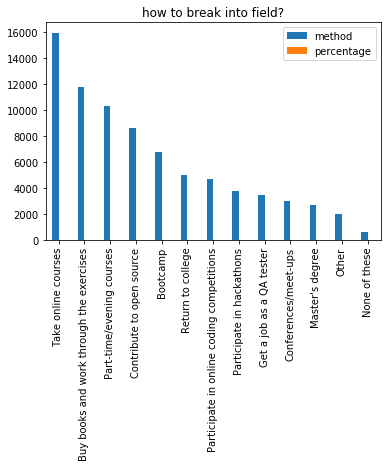

In [231]:
ed_count.plot(kind='bar', title='how to break into field?');

## Now Let's See what "people with salary" suggest

In [148]:
salaried_crowd = survey_2017[['CousinEducation', 'Salary']]

In [153]:
salaried_crowd = salaried_crowd[salaried_crowd['Salary'] >0]
salaried_crowd.head()

,CousinEducation,Salary
2,NaN,113750.0
14,NaN,100000.0
17,NaN,130000.0
18,Get a job as a QA tester; Conferences/meet-ups,82500.0
22,NaN,100764.0


In [222]:
salaried_crowd=salaried_crowd.dropna()


In [223]:
salaried_crowd.head()

,CousinEducation,Salary
18,Get a job as a QA tester; Conferences/meet-ups,82500.000000
34,Get a job as a QA tester; Take online courses;...,14838.709677
61,None of these,6636.323594
65,Get a job as a QA tester; Take online courses;...,17777.777778
90,Take online courses; Bootcamp; Part-time/eveni...,38600.000000


In [ ]:
ed_count = pd.DataFrame(salaried_crowd.method.value_counts())
ed_count['percentage'] = ed_count['method']/education.shape[0]
ed_count

In [233]:
salaried_crowd.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [238]:
sal_group=salaried_crowd.groupby('CousinEducation')

In [239]:
sal_group.count()

,Salary
CousinEducation,
Bootcamp,36
Bootcamp; Buy books and work through the exercises,17
Bootcamp; Buy books and work through the exercises; Conferences/meet-ups,6
Bootcamp; Buy books and work through the exercises; Conferences/meet-ups; Other,5
Bootcamp; Buy books and work through the exercises; Other,2
Bootcamp; Conferences/meet-ups,6
Bootcamp; Conferences/meet-ups; Other,1
Bootcamp; Other,4
Bootcamp; Part-time/evening courses,11


In [ ]:


final_list = []
for item in list(salaried_crowd.CousinEducation):
    final_list.append(item.split(';'))
education=pd.DataFrame(final_list)

education.columns = ['col1','col2','col3', 'col4']

education = pd.DataFrame(list(education['col1']) + list(education['col2']) 
                         + list(education['col3']) + list(education['col4']))


education.columns = ['method']
#ed_df1.value_counts()

#education.method.value_counts()

education['method'] = education['method'].apply(lambda x: str(x).strip())
education = education[education['method'] != 'None']



In [290]:
salaried_crowd.shape[0]

6733

In [286]:
n=salaried_crowd.shape[0]
counter = 0
temp_list = []
while n > counter:
    a=list(salaried_crowd.iloc[counter])
    b=a[0]
    c=list(a[1].split(';'))
    temp_list.append([b,c])
    counter +=1
    


In [296]:
df_salary = pd.DataFrame(temp_list)

In [298]:
df_salary.columns = ['Salary', 'Method']

In [311]:
df_salaried_crowd = pd.DataFrame(list(df_salary.Method))

In [313]:
df_salaried_crowd.columns = ['col1','col2','col3', 'col4']

In [314]:
df_salaried_crowd = pd.DataFrame(list(df_salaried_crowd['col1']) + 
                                 list(df_salaried_crowd['col2']) + 
                                 list(df_salaried_crowd['col3']) + 
                                 list(df_salaried_crowd['col4']))

df_salaried_crowd.columns = ['method']

df_salaried_crowd['method'] = df_salaried_crowd['method'].apply(lambda x: str(x).strip())
df_salaried_crowd = df_salaried_crowd[df_salaried_crowd['method'] != 'None']



In [316]:
df_salaried_crowd = df_salaried_crowd[df_salaried_crowd['method'] != 'None']

In [318]:
df_salaried_crowd.head(3)

,method
0,Get a job as a QA tester
1,Get a job as a QA tester
2,None of these


In [319]:
ed_count1 = pd.DataFrame(df_salaried_crowd.method.value_counts())
ed_count1['percentage'] = ed_count1['method']/df_salaried_crowd.shape[0]
ed_count1

,method,percentage
Take online courses,4493,0.210356
Buy books and work through the exercises,3393,0.158856
Contribute to open source,2253,0.105482
Part-time/evening courses,2117,0.099115
Conferences/meet-ups,1677,0.078515
Bootcamp,1622,0.075940
Return to college,1474,0.069011
Get a job as a QA tester,1032,0.048317
Participate in online coding competitions,931,0.043588
Participate in hackathons,796,0.037268


## Suggestion by People who earn a salary

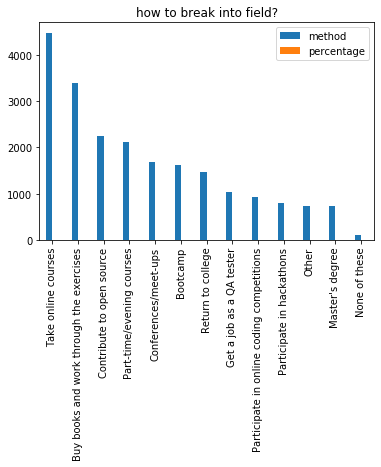

In [321]:
ed_count1.plot(kind='bar', title='how to break into field?');

# Let's look at bootcamp graduate

In [329]:
bootcamp_no = survey_2017[survey_2017['TimeAfterBootcamp'].isnull()==True]
bootcamp_yes = survey_2017[survey_2017['TimeAfterBootcamp'].isnull()==False]

In [331]:
print("People With Bootcamp experience:",bootcamp_yes.shape[0])
print("People without Bootcamp experience:",bootcamp_no.shape[0])

People With Bootcamp experience: 2602
People without Bootcamp experience: 48790


In [339]:
bootcamp_yes['Gender'].value_counts()/(bootcamp_yes.shape[0]-sum(bootcamp_yes['Gender'].isnull()))

Male                                                       0.863071
Female                                                     0.112494
Other                                                      0.006455
Gender non-conforming                                      0.005533
Male; Other                                                0.002766
Male; Gender non-conforming                                0.001383
Female; Gender non-conforming                              0.001383
Male; Transgender                                          0.000922
Transgender; Gender non-conforming                         0.000922
Male; Female; Transgender; Gender non-conforming; Other    0.000922
Transgender                                                0.000922
Female; Transgender; Gender non-conforming                 0.000922
Male; Female                                               0.000922
Male; Gender non-conforming; Other                         0.000461
Female; Gender non-conforming; Other            

In [340]:

bootcamp_no['Gender'].value_counts()/(bootcamp_no.shape[0]-sum(bootcamp_no['Gender'].isnull()))


Male                                                       0.903857
Female                                                     0.071659
Other                                                      0.006418
Male; Other                                                0.005019
Gender non-conforming                                      0.004501
Male; Gender non-conforming                                0.001886
Female; Transgender                                        0.001703
Transgender                                                0.001612
Female; Gender non-conforming                              0.000791
Male; Female                                               0.000395
Transgender; Gender non-conforming                         0.000395
Male; Female; Transgender; Gender non-conforming; Other    0.000395
Male; Transgender                                          0.000274
Male; Female; Transgender; Gender non-conforming           0.000182
Female; Transgender; Gender non-conforming      

In [341]:

bootcamp_yes['FormalEducation'].value_counts()/(bootcamp_yes.shape[0]-sum(bootcamp_yes['FormalEducation'].isnull()))


Bachelor's degree                                                    0.475019
Master's degree                                                      0.225211
Some college/university study without earning a bachelor's degree    0.162567
Secondary school                                                     0.069562
Doctoral degree                                                      0.022291
Professional degree                                                  0.016141
I prefer not to answer                                               0.011914
Primary/elementary school                                            0.009224
I never completed any formal education                               0.008071
Name: FormalEducation, dtype: float64

In [342]:
bootcamp_no['FormalEducation'].value_counts()/(bootcamp_no.shape[0]-sum(bootcamp_no['FormalEducation'].isnull()))



Bachelor's degree                                                    0.417565
Master's degree                                                      0.216335
Some college/university study without earning a bachelor's degree    0.157942
Secondary school                                                     0.117381
Doctoral degree                                                      0.025620
I prefer not to answer                                               0.022095
Primary/elementary school                                            0.020967
Professional degree                                                  0.013794
I never completed any formal education                               0.008301
Name: FormalEducation, dtype: float64

In [343]:

bootcamp_yes['TimeAfterBootcamp'].value_counts()/bootcamp_yes.shape[0]


I already had a job as a developer when I started the program    0.458493
Immediately upon graduating                                      0.112990
I got a job as a developer before completing the program         0.096849
One to three months                                              0.087625
I haven't gotten a job as a developer yet                        0.081091
Less than a month                                                0.059954
Four to six months                                               0.040354
Longer than a year                                               0.032667
Six months to a year                                             0.029977
Name: TimeAfterBootcamp, dtype: float64

/Users/monikabagyal/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


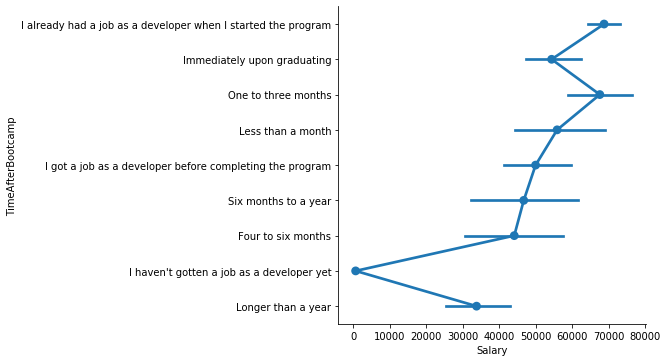

In [348]:

sns.factorplot(x='Salary' , y='TimeAfterBootcamp',data=bootcamp_yes[['Salary', 'TimeAfterBootcamp']])


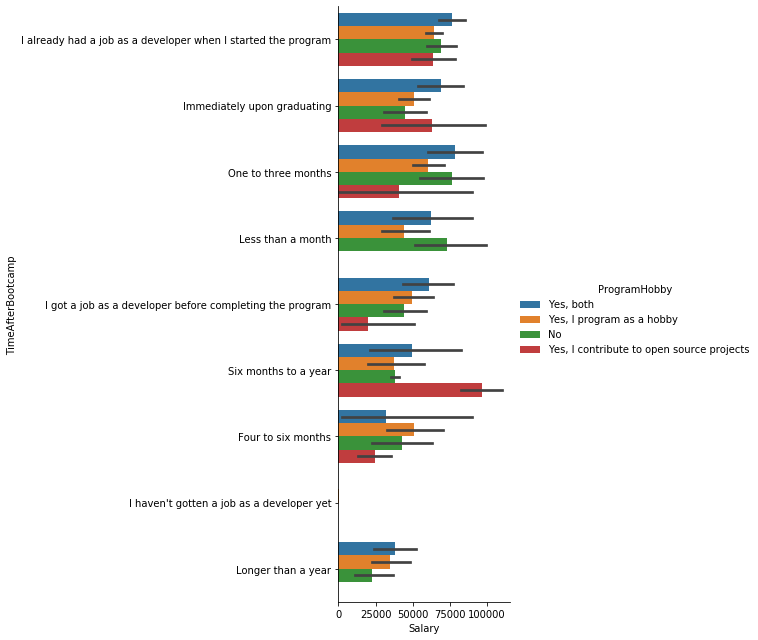

In [414]:
ax = sns.catplot(x='Salary', y='TimeAfterBootcamp',data=bootcamp_yes[['Salary', 'TimeAfterBootcamp','ProgramHobby']]
                 , height=9, kind="bar", hue='ProgramHobby');


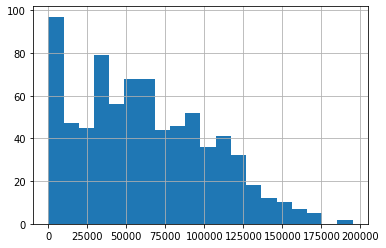

In [415]:
bootcamp_yes['Salary'].hist(bins=20)

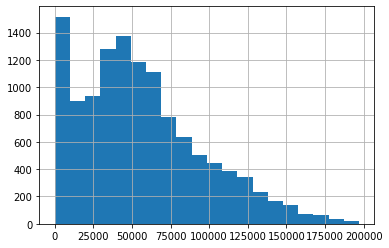

In [416]:
bootcamp_no['Salary'].hist(bins=20)

# Job Satisfaction

In [418]:
survey_2017['JobSatisfaction'].isnull().mean() 

0.21435242839352428

In [419]:
#According to EmploymentStatus, which group has the highest average job satisfaction?
survey_2017.groupby(['EmploymentStatus']).mean()['JobSatisfaction']


EmploymentStatus
Employed full-time                                      6.926805
Employed part-time                                      6.821468
I prefer not to say                                          NaN
Independent contractor, freelancer, or self-employed    7.252823
Not employed, and not looking for work                  7.000000
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

In [420]:
#In general, do smaller companies appear to have employees with higher job satisfaction?
survey_2017.groupby(['CompanySize']).mean()['JobSatisfaction'].sort_values()


CompanySize
5,000 to 9,999 employees    6.748153
10,000 or more employees    6.810345
I don't know                6.842679
500 to 999 employees        6.883661
1,000 to 4,999 employees    6.884509
100 to 499 employees        6.937089
20 to 99 employees          6.949092
10 to 19 employees          7.000799
Fewer than 10 employees     7.008749
I prefer not to answer      7.280835
Name: JobSatisfaction, dtype: float64

In [423]:
#Do individuals who program outside of work appear to have higher JobSatisfaction?

survey_2017.groupby(['ProgramHobby']).mean()['JobSatisfaction'].sort_values()

ProgramHobby
No                                           6.833825
Yes, I program as a hobby                    6.913072
Yes, I contribute to open source projects    7.041535
Yes, both                                    7.108041
Name: JobSatisfaction, dtype: float64

In [424]:
#Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?

survey_2017.groupby(['HomeRemote']).mean()['JobSatisfaction'].sort_values()

HomeRemote
Never                                                      6.632502
It's complicated                                           6.840830
More than half, but not all, the time                      6.953184
About half the time                                        6.973702
A few days each month                                      7.077509
Less than half the time, but at least one day each week    7.120125
All or almost all the time (I'm full-time remote)          7.388430
Name: JobSatisfaction, dtype: float64

In [429]:
#A friend says a Doctoral degree increases the chance of having job you like, does this seem true?

survey_2017.groupby(['FormalEducation']).mean()['JobSatisfaction'].sort_values()

FormalEducation
I never completed any formal education                               6.833333
Bachelor's degree                                                    6.866363
Master's degree                                                      6.953151
Primary/elementary school                                            6.956897
I prefer not to answer                                               7.005682
Some college/university study without earning a bachelor's degree    7.081334
Professional degree                                                  7.087459
Secondary school                                                     7.143082
Doctoral degree                                                      7.348857
Name: JobSatisfaction, dtype: float64

# Supervised Machine Learning Model - Salary Prediction

In [430]:
survey_2017.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


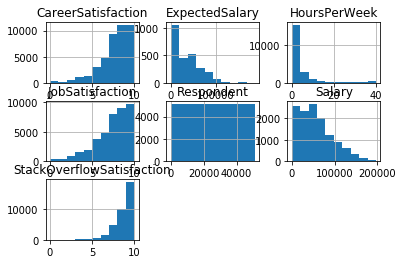

In [432]:
survey_2017.hist();

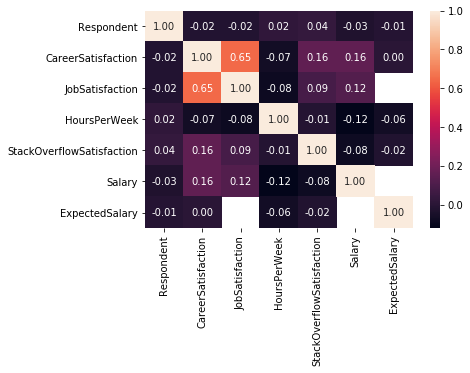

In [437]:
sns.heatmap(survey_2017.corr(), annot=True, fmt='.2f');

In [444]:
df = survey_2017[['CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek', 
                'StackOverflowSatisfaction', 'Salary']].dropna()

X = df.drop('Salary', axis=1)
y = df['Salary']

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 

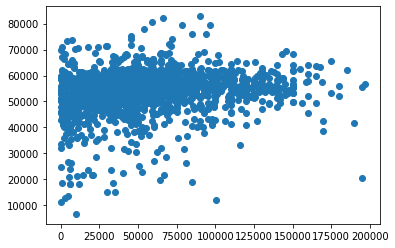

In [452]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)


In [453]:
print('Intercept:',lm.intercept_)

Intercept: 60610.2545540679


In [454]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CareerSatisfaction,3428.008671
JobSatisfaction,-579.014645
HoursPerWeek,-957.054088
StackOverflowSatisfaction,-3025.980119


In [455]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 31125.915172588037
MSE: 1546382888.0495827
RMSE: 39324.075170938006


In [460]:
from sklearn.metrics import r2_score
print('R2 Score : %',r2_score(y_test, predictions)*100)

R2 Score : % 3.0994664959115403


In [462]:
# Linear Regression is performing very bad which was expected, 
# it needs more relevant features which requires lot of data cleaning in order to perform better.

